<a href="https://colab.research.google.com/github/PeronxD/Python/blob/main/an%C3%A1lises_chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando os dados a serem analisados [GM Chess Games](https://www.kaggle.com/datasets/lazaro97/gm-chess-games?resource=download)

In [264]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [265]:
import pandas as pd
import numpy as np

In [266]:
dados_biog = pd.read_csv('players_biography.csv')
#dados_biog_result = pd.read_csv('players_result_of_openings.csv')

In [267]:
dados = dados_biog
dados.drop(columns = ['FIDE ID'],inplace=True)

In [268]:
#dados_biog_result.columns = ['Name','Color','Opening','N_games','N_wins','N_losses','N_draws']

In [269]:
##dados = pd.merge(dados_biog, dados_biog_result, on = "Name")



In [270]:
dados.head(5)

,Name,Born,Results,White Results,Black Results,Active,Current Rating,Max Rating,Country
0,"Salem, A. R. Saleh",1993,Win: 46.9% (519) Loss: 26.6% (294) Draw: 26.6%...,Win: 50.7% (284) Loss: 23.4% (131) Draw: 25.9%...,Win: 43% (235) Loss: 29.8% (163) Draw: 27.2% (...,2002-08-22 to 2019-12-30,2682 on 2021-04-01,2682 on 2020-01-01,UAE
1,"Schwarz, Adolf",1836-10-31,Win: 28.6% (38) Loss: 42.1% (56) Draw: 29.3% (...,Win: 28.4% (19) Loss: 35.8% (24) Draw: 35.8% (...,Win: 28.8% (19) Loss: 48.5% (32) Draw: 22.7% (...,1873 to 1900,2657*,2657*,HUN/AUT
2,"Rakhmanov, Aleksandr",1989,Win: 40.6% (617) Loss: 17.9% (271) Draw: 41.5%...,Win: 46% (354) Loss: 14% (108) Draw: 40% (308)...,Win: 35.2% (263) Loss: 21.8% (163) Draw: 43% (...,2001-10-01 to 2020-12-17,2651 on 2021-04-01,2676 on 2017-05-01,RUS
3,"Alekhine, Alexander",1892-10-31,Win: 56.8% (725) Loss: 11.9% (152) Draw: 31.3%...,Win: 60.3% (417) Loss: 11.1% (77) Draw: 28.6% ...,Win: 52.6% (308) Loss: 12.8% (75) Draw: 34.5% ...,1906 to 1946,2700*,2700*,URS
4,"Areshchenko, Alexander",1986,Win: 43.6% (568) Loss: 14.7% (191) Draw: 41.7%...,Win: 52.7% (351) Loss: 11.6% (77) Draw: 35.7% ...,Win: 34.1% (217) Loss: 17.9% (114) Draw: 48% (...,1996 to 2019-12-08,2687 on 2021-04-01,2720 on 2012-12-01,UKR


## Verificar a consistência dos dados

In [271]:
dados.isna().sum() # temos alguns valores faltantes

Name              0
Born              0
Results           0
White Results     0
Black Results     0
Active            0
Current Rating    0
Max Rating        0
Country           0
dtype: int64

In [272]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            128 non-null    object
 1   Born            128 non-null    object
 2   Results         128 non-null    object
 3   White Results   128 non-null    object
 4   Black Results   128 non-null    object
 5   Active          128 non-null    object
 6   Current Rating  128 non-null    object
 7   Max Rating      128 non-null    object
 8   Country         128 non-null    object
dtypes: object(9)
memory usage: 9.1+ KB


## Tratamento do dataframe


In [273]:
# a ideia aqui é splitar essas variáveis para podermos pegar apenas a parte numérica útil
dados['Current Rating'] = dados['Current Rating'].str.strip().str.split(' ').str[0]
dados['Max Rating'] = dados['Max Rating'].str.strip().str.split(' ').str[0]
dados['Born'] = dados['Born'].str.strip().str.split('-').str[0]


In [274]:
import re

dados['Current Rating'] = dados['Current Rating'].str.replace(r'\D', '', regex=True)
dados['Born'] = dados['Born'].str.replace(r'\D', '', regex=True)
dados['Max Rating'] = dados['Max Rating'].str.replace(r'\D', '', regex=True)

# Converter para inteiros
dados['Current Rating'] = dados['Current Rating'].astype(int)
dados['Born'] = dados['Born'].astype(int)
dados['Max Rating'] = dados['Max Rating'].astype(int)


In [275]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            128 non-null    object
 1   Born            128 non-null    int64 
 2   Results         128 non-null    object
 3   White Results   128 non-null    object
 4   Black Results   128 non-null    object
 5   Active          128 non-null    object
 6   Current Rating  128 non-null    int64 
 7   Max Rating      128 non-null    int64 
 8   Country         128 non-null    object
dtypes: int64(3), object(6)
memory usage: 9.1+ KB


In [276]:
dados['Idade'] = 2021 - dados.Born # add coluna de idade dos jogadores

## Ordenando em relação ao rating

In [277]:
dados = dados.sort_values(by='Current Rating', ascending=False).reset_index(drop=True)

## Análise exploratória


In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

In [279]:
dados.describe()

,Born,Current Rating,Max Rating,Idade
count,128.000000,128.000000,128.000000,128.000000
mean,1964.960938,2697.023438,2726.664062,56.039062
std,48.564010,42.273848,51.163668,48.564010
min,1806.000000,2650.000000,2650.000000,18.000000
25%,1973.000000,2663.750000,2685.250000,28.750000
50%,1986.000000,2683.000000,2719.000000,35.000000
75%,1992.250000,2715.250000,2761.000000,48.000000
max,2003.000000,2847.000000,2882.000000,215.000000


<Axes: xlabel='Current Rating', ylabel='Count'>

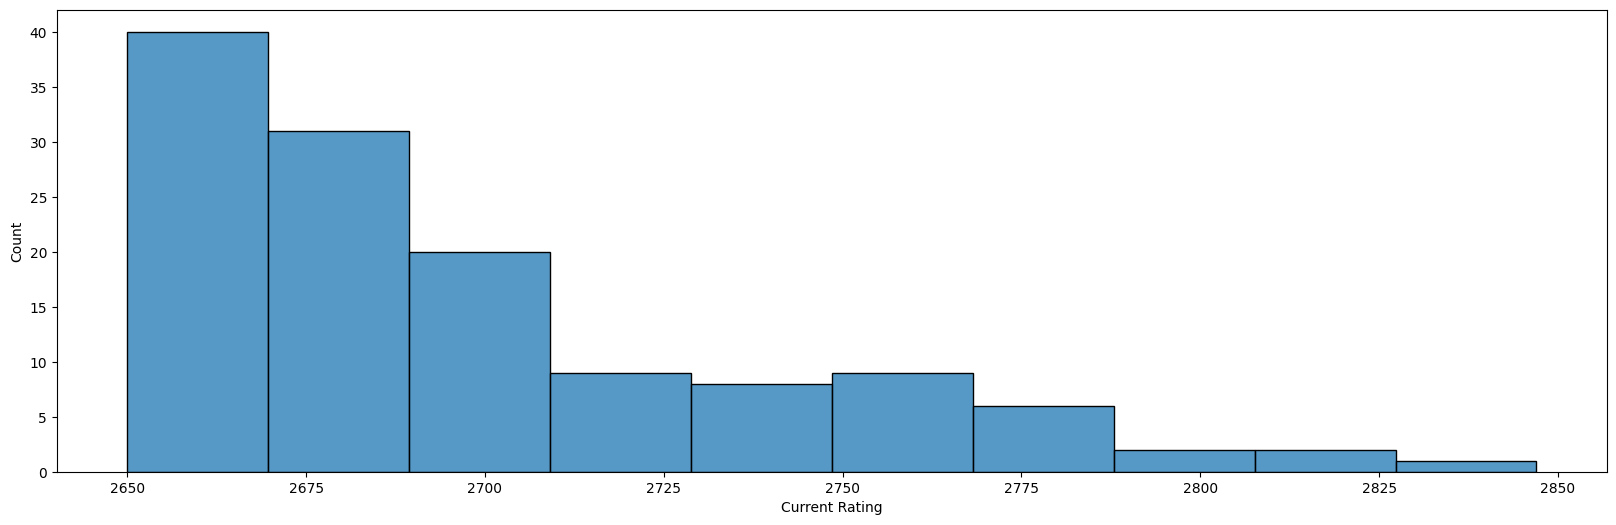

In [280]:
# histogrma dos ratings
sns.histplot(dados['Current Rating'])

<Axes: ylabel='Current Rating'>

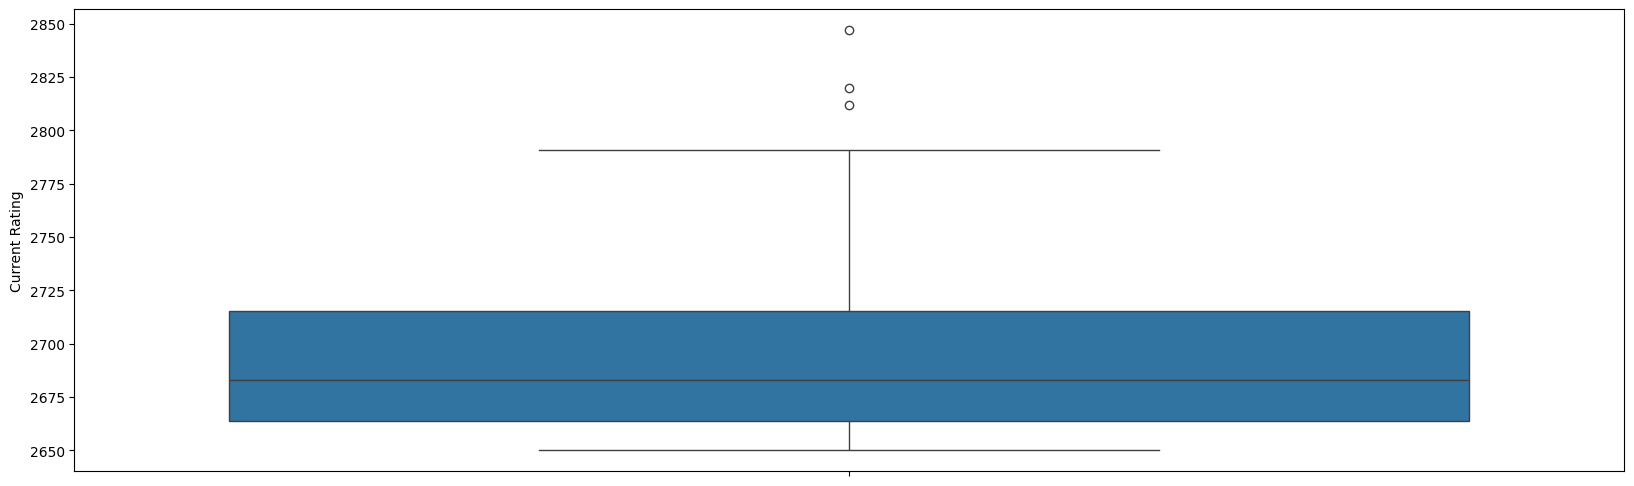

In [281]:
#boxplot dos ratings
sns.boxplot(dados['Current Rating'])

In [282]:
# olhando para os 100 maiores raitings do df
top100 = dados.head(100)

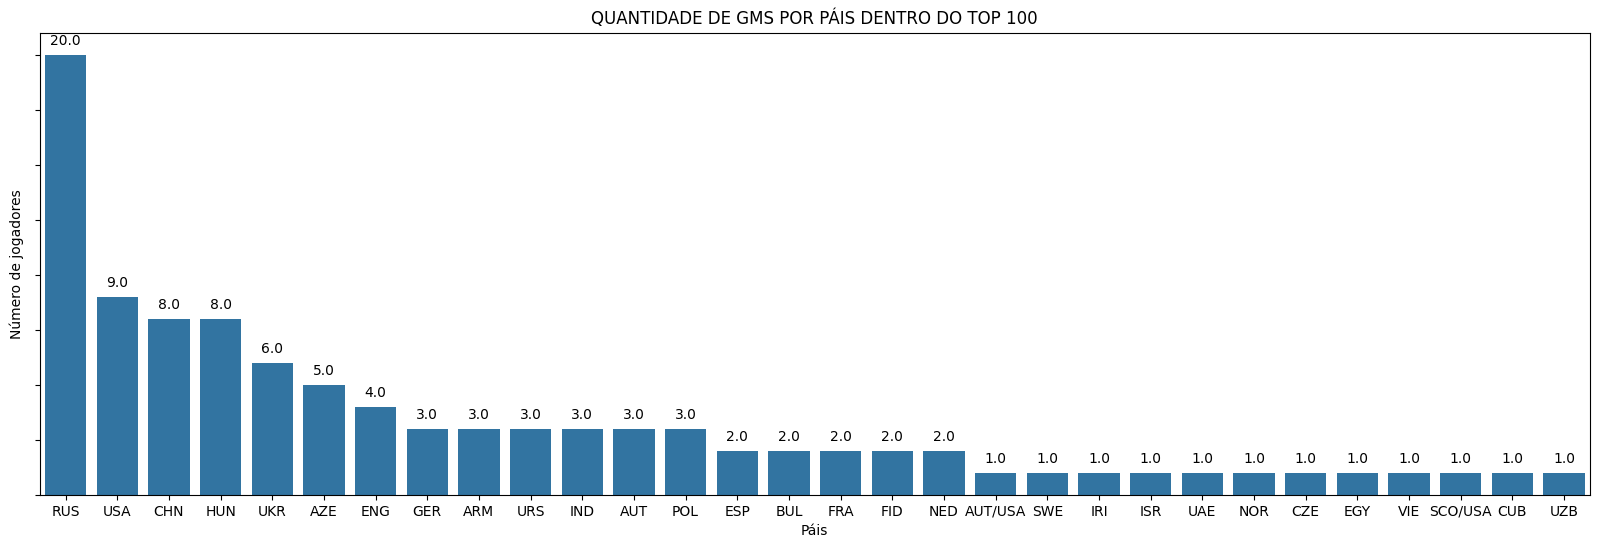

In [283]:
ax = sns.countplot(data=top100, x='Country', order=top100['Country'].value_counts().index)

plt.xlabel('Páis')
plt.ylabel('Número de jogadores')
plt.title('QUANTIDADE DE GMS POR PÁIS DENTRO DO TOP 100')
ax.set(yticklabels=[])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


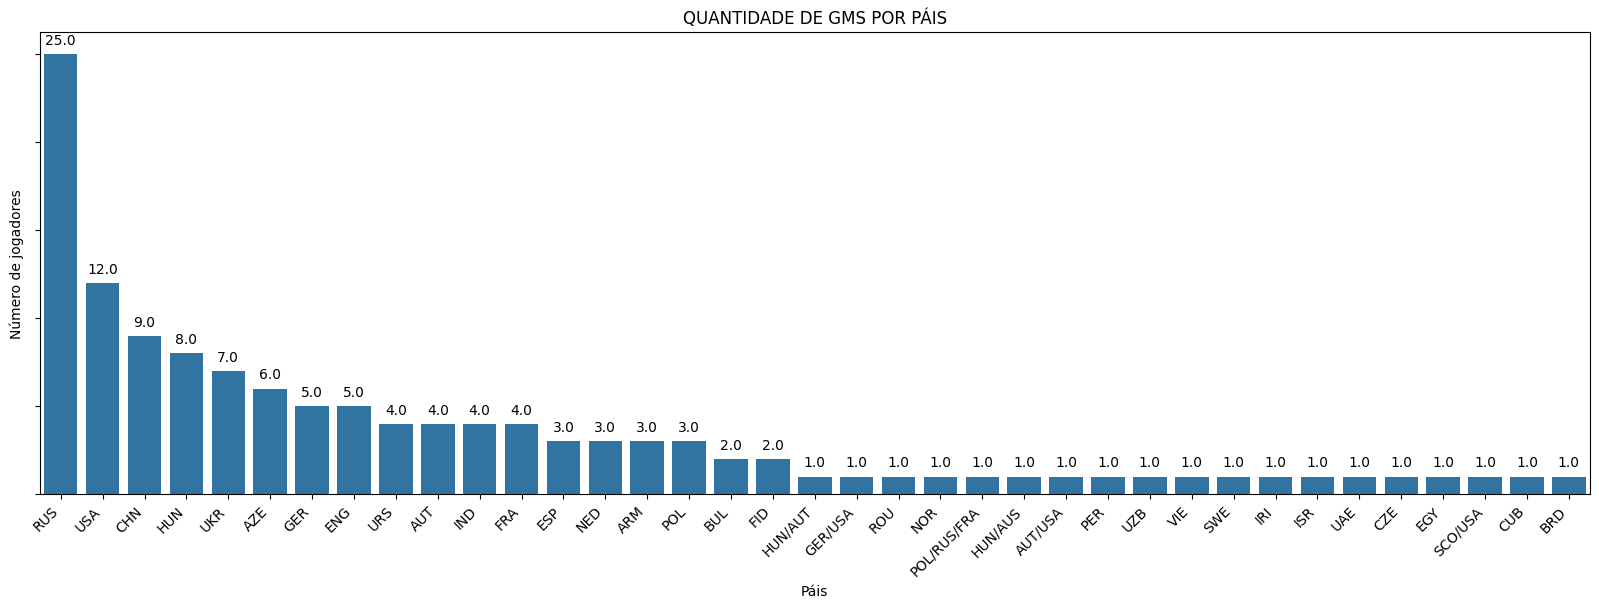

In [284]:
ax = sns.countplot(data=dados, x='Country', order=dados['Country'].value_counts().index)

plt.xlabel('Páis')
plt.ylabel('Número de jogadores')
plt.title('QUANTIDADE DE GMS POR PÁIS')
ax.set(yticklabels=[])
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

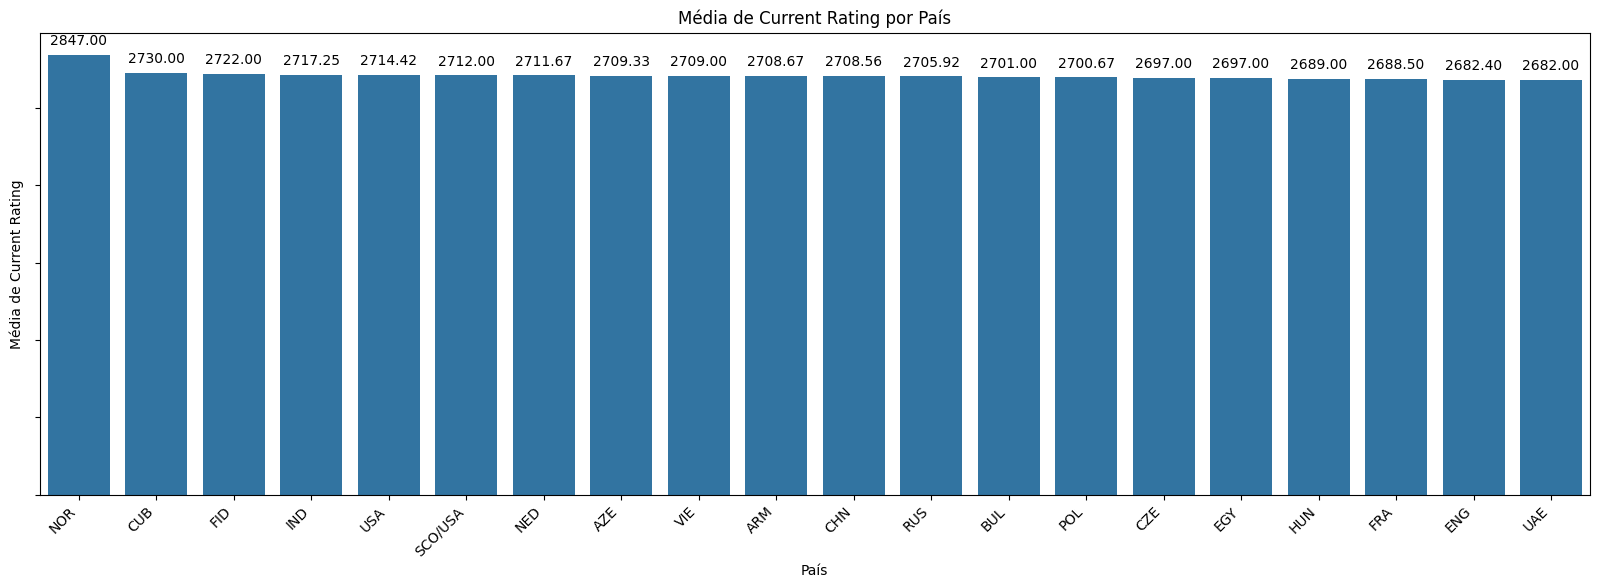

In [285]:
media_por_pais = dados.groupby('Country')['Current Rating'].mean().reset_index()
top10_medias = media_por_pais.sort_values(by='Current Rating', ascending=False).head(20)

ax = sns.barplot(data=top10_medias, x='Country', y='Current Rating')

plt.xlabel('País')
plt.ylabel('Média de Current Rating')
plt.title('Média de Current Rating por País')
ax.set(yticklabels=[])
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [286]:
idades = ['0-15','16-25','26']

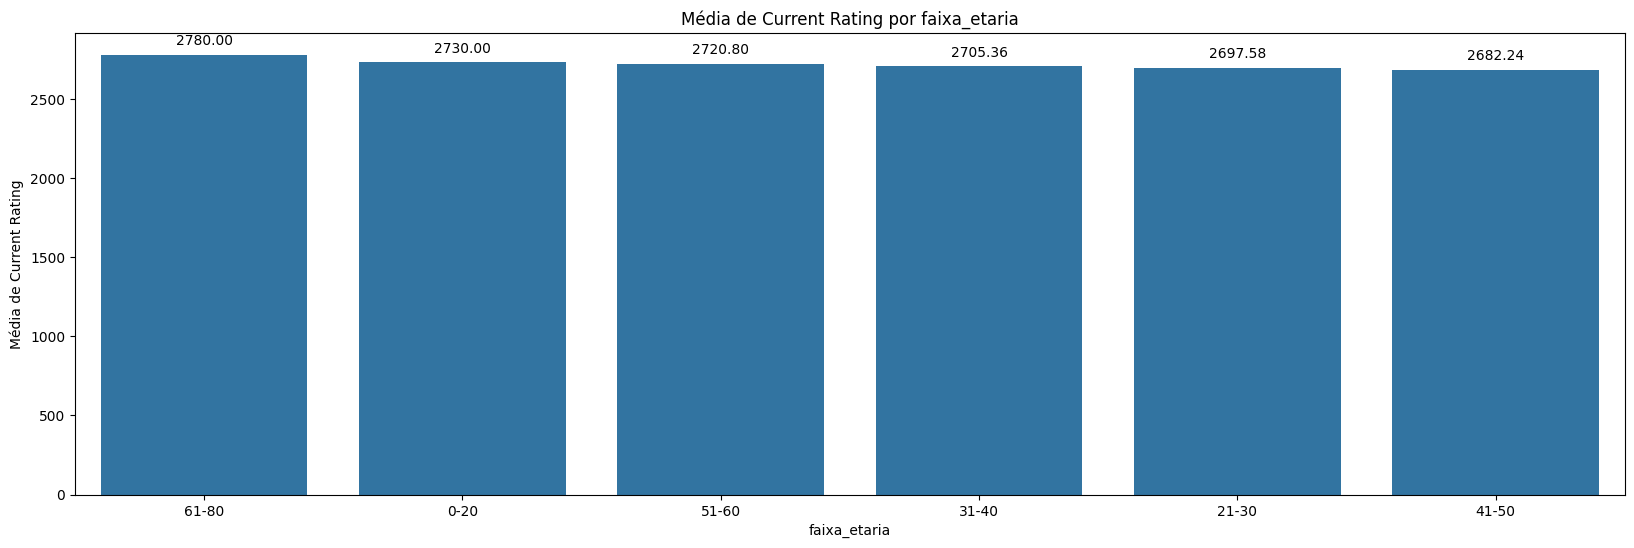

In [287]:
faixas_etarias = [0, 20, 30, 40, 50, 60, 80]
dados['faixa_etaria'] = pd.cut(dados['Idade'], bins=faixas_etarias, labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-80'])

# Calcule a média de 'Current Rating' para cada faixa_etaria
media_por_faixa = dados.groupby('faixa_etaria')['Current Rating'].mean().reset_index()

# Ordene as faixas etárias pela média de 'Current Rating'
media_por_faixa = media_por_faixa.sort_values(by='Current Rating', ascending=False)

# Crie o gráfico de barras
ax = sns.barplot(data=media_por_faixa, x='faixa_etaria', y='Current Rating',order=media_por_faixa['faixa_etaria'])

plt.xlabel('faixa_etaria')
plt.ylabel('Média de Current Rating')
plt.title('Média de Current Rating por faixa_etaria')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


# A partir daqui a minha ideia é validar algumas perguntas como por exemplo

*   Jogadores mais jovens (até 30 anos) tendem a arriscar mais enquanto os jogadores mais antigos(mais que 40 anos) são mais conservadores.
*   Existe diferença entre o estilo de jogo dos Russos e dos Americanos
*   Analisar em separado Kasparov x Carlsen


In [288]:
dados.head(5)

,Name,Born,Results,White Results,Black Results,Active,Current Rating,Max Rating,Country,Idade,faixa_etaria
0,"Carlsen, Magnus",1990,Win: 45.2% (1326) Loss: 15.3% (449) Draw: 39.5...,Win: 52% (775) Loss: 13.2% (197) Draw: 34.7% (...,Win: 38.2% (551) Loss: 17.5% (252) Draw: 44.4%...,2000 to 2020-04-07,2847,2882,NOR,31,31-40
1,"Caruana, Fabiano",1992,Win: 38.8% (959) Loss: 22.6% (558) Draw: 38.6%...,Win: 45.2% (561) Loss: 19.6% (243) Draw: 35.2%...,Win: 32.4% (398) Loss: 25.6% (315) Draw: 42% (...,2001-10-22 to 2020-03-25,2820,2844,USA,29,21-30
2,"Kasparov, Garry",1963,Win: 50.4% (1096) Loss: 8.4% (183) Draw: 41.2%...,Win: 59.4% (719) Loss: 5.3% (64) Draw: 35.3% (...,Win: 39.1% (377) Loss: 12.3% (119) Draw: 48.6%...,1973 to 2017-08-18,2812,2851,RUS,58,51-60
3,"Ding, Liren",1992,Win: 34.8% (487) Loss: 16.1% (225) Draw: 49.2%...,Win: 40.7% (290) Loss: 14.3% (102) Draw: 44.9%...,Win: 28.6% (197) Loss: 17.9% (123) Draw: 53.6%...,2001-03-26 to 2020-03-25,2791,2816,CHN,29,21-30
4,"Nepomniachtchi, Ian",1990,Win: 39.9% (913) Loss: 19.6% (449) Draw: 40.5%...,Win: 46.3% (535) Loss: 15.6% (180) Draw: 38.1%...,Win: 33.3% (378) Loss: 23.7% (269) Draw: 42.9%...,2000-10-06 to 2020-12-15,2789,2789,RUS,31,31-40


## Criando novas colunas com informações de vitórais derrotas e empates

In [289]:
# criando uma lista de strings com o split de Results
dados['Results'] = dados['Results'].str.split()
dados['White Results'] = dados['White Results'].str.split()
dados['Black Results'] = dados['Black Results'].str.split()


# Criando colunas específicas para Results
dados['taxa_vitoria'] = dados['Results'].apply(lambda x: x[1] if len(x) > 0 else None)
dados['numero_vitorias'] = dados['Results'].apply(lambda x: x[2] if len(x) > 0 else None)

dados['taxa_derrota'] = dados['Results'].apply(lambda x: x[4] if len(x) > 0 else None)
dados['numero_derrotas'] = dados['Results'].apply(lambda x: x[5] if len(x) > 0 else None)

dados['taxa_empate'] = dados['Results'].apply(lambda x: x[7] if len(x) > 0 else None)
dados['numero_empates'] = dados['Results'].apply(lambda x: x[8] if len(x) > 0 else None)




# Criando colunas específicas para White Results
dados['taxa_vitoria_brancas'] = dados['White Results'].apply(lambda x: x[1] if len(x) > 0 else None)
dados['numero_vitorias_brancas'] = dados['White Results'].apply(lambda x: x[2] if len(x) > 0 else None)

dados['taxa_derrota_brancas'] = dados['White Results'].apply(lambda x: x[4] if len(x) > 0 else None)
dados['numero_derrotas_brancas'] = dados['White Results'].apply(lambda x: x[5] if len(x) > 0 else None)

dados['taxa_empate_brancas'] = dados['White Results'].apply(lambda x: x[7] if len(x) > 0 else None)
dados['numero_empates_brancas'] = dados['White Results'].apply(lambda x: x[8] if len(x) > 0 else None)


# Criando colunas específicas para Black Results
dados['taxa_vitoria_pretas'] = dados['Black Results'].apply(lambda x: x[1] if len(x) > 0 else None)
dados['numero_vitorias_pretas'] = dados['Black Results'].apply(lambda x: x[2] if len(x) > 0 else None)

dados['taxa_derrota_pretas'] = dados['Black Results'].apply(lambda x: x[4] if len(x) > 0 else None)
dados['numero_derrotas_pretas'] = dados['Black Results'].apply(lambda x: x[5] if len(x) > 0 else None)

dados['taxa_empate_pretas'] = dados['Black Results'].apply(lambda x: x[7] if len(x) > 0 else None)
dados['numero_empates_pretas'] = dados['Black Results'].apply(lambda x: x[8] if len(x) > 0 else None)





In [290]:
# tirando % e () e definindo o tipo das variáveis
dados['taxa_vitoria'] = dados['taxa_vitoria'].str.rstrip('%').astype('float') / 100
dados['numero_vitorias'] = dados['numero_vitorias'].str.replace('(', '').str.replace(')', '').astype('int')


dados['taxa_derrota'] = dados['taxa_derrota'].str.rstrip('%').astype('float') / 100
dados['numero_derrotas'] = dados['numero_derrotas'].str.replace('(','').str.replace(')', '').astype('int')


dados['taxa_empate'] = dados['taxa_empate'].str.rstrip('%').astype('float') / 100
dados['numero_empates'] = dados['numero_empates'].str.replace('(','').str.replace(')', '').astype('int')



# para White Results
dados['taxa_vitoria_brancas'] = dados['taxa_vitoria_brancas'].str.rstrip('%').astype('float') / 100
dados['numero_vitorias_brancas'] = dados['numero_vitorias_brancas'].str.replace('(', '').str.replace(')', '').astype('int')


dados['taxa_derrota_brancas'] = dados['taxa_derrota_brancas'].str.rstrip('%').astype('float') / 100
dados['numero_derrotas_brancas'] = dados['numero_derrotas_brancas'].str.replace('(','').str.replace(')', '').astype('int')


dados['taxa_empate_brancas'] = dados['taxa_empate_brancas'].str.rstrip('%').astype('float') / 100
dados['numero_empates_brancas'] = dados['numero_empates_brancas'].str.replace('(','').str.replace(')', '').astype('int')



# para Black Results
dados['taxa_vitoria_pretas'] = dados['taxa_vitoria_pretas'].str.rstrip('%').astype('float') / 100
dados['numero_vitorias_pretas'] = dados['numero_vitorias_pretas'].str.replace('(', '').str.replace(')', '').astype('int')


dados['taxa_derrota_pretas'] = dados['taxa_derrota_pretas'].str.rstrip('%').astype('float') / 100
dados['numero_derrotas_pretas'] = dados['numero_derrotas_pretas'].str.replace('(','').str.replace(')', '').astype('int')


dados['taxa_empate_pretas'] = dados['taxa_empate_pretas'].str.rstrip('%').astype('float') / 100
dados['numero_empates_pretas'] = dados['numero_empates_pretas'].str.replace('(','').str.replace(')', '').astype('int')

<ipython-input-290-a22316f0469f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['numero_vitorias'] = dados['numero_vitorias'].str.replace('(', '').str.replace(')', '').astype('int')
<ipython-input-290-a22316f0469f>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['numero_derrotas'] = dados['numero_derrotas'].str.replace('(','').str.replace(')', '').astype('int')
<ipython-input-290-a22316f0469f>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['numero_empates'] = dados['numero_empates'].str.replace('(

In [291]:
dados.drop(columns=['Results','White Results','Black Results'],inplace=True)

In [292]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Name                     128 non-null    object  
 1   Born                     128 non-null    int64   
 2   Active                   128 non-null    object  
 3   Current Rating           128 non-null    int64   
 4   Max Rating               128 non-null    int64   
 5   Country                  128 non-null    object  
 6   Idade                    128 non-null    int64   
 7   faixa_etaria             105 non-null    category
 8   taxa_vitoria             128 non-null    float64 
 9   numero_vitorias          128 non-null    int64   
 10  taxa_derrota             128 non-null    float64 
 11  numero_derrotas          128 non-null    int64   
 12  taxa_empate              128 non-null    float64 
 13  numero_empates           128 non-null    int64   
 14  taxa_vitor

In [293]:
dados.head(2)

,Name,Born,Active,Current Rating,Max Rating,Country,Idade,faixa_etaria,taxa_vitoria,numero_vitorias,...,taxa_derrota_brancas,numero_derrotas_brancas,taxa_empate_brancas,numero_empates_brancas,taxa_vitoria_pretas,numero_vitorias_pretas,taxa_derrota_pretas,numero_derrotas_pretas,taxa_empate_pretas,numero_empates_pretas
0,"Carlsen, Magnus",1990,2000 to 2020-04-07,2847,2882,NOR,31,31-40,0.452,1326,...,0.132,197,0.347,517,0.382,551,0.175,252,0.444,640
1,"Caruana, Fabiano",1992,2001-10-22 to 2020-03-25,2820,2844,USA,29,21-30,0.388,959,...,0.196,243,0.352,437,0.324,398,0.256,315,0.420,517


## Separando entre jovens (até 30 anos) e antigos (mais que 40 anos)

In [294]:
for i in range(len(dados.index)):
    if (dados.loc[i, 'faixa_etaria'] == '0-20') or (dados.loc[i, 'faixa_etaria'] == '21-30'):
        dados.loc[i, 'classificacao'] = 'Jovem'
    elif (dados.loc[i, 'faixa_etaria'] == '41-50') or (dados.loc[i, 'faixa_etaria'] == '51-60'):
        dados.loc[i, 'classificacao'] = 'Antigo'



In [295]:
jovens = dados[dados['classificacao'] == 'Jovem']

antigos = dados[dados['classificacao'] == 'Antigo']

In [296]:
jovens.shape[0],antigos.shape[0]

(38, 22)

In [297]:
jovens['Current Rating'].describe(), antigos['Current Rating'].describe()

(count      38.000000
 mean     2699.289474
 std        42.338346
 min      2652.000000
 25%      2666.250000
 50%      2689.000000
 75%      2709.750000
 max      2820.000000
 Name: Current Rating, dtype: float64,
 count      22.000000
 mean     2691.000000
 std        40.553316
 min      2656.000000
 25%      2662.250000
 50%      2675.500000
 75%      2709.000000
 max      2812.000000
 Name: Current Rating, dtype: float64)

In [298]:
# Médias
medias_vitoria_brancas = dados.groupby('classificacao')['taxa_vitoria_brancas'].mean()
medias_vitoria_pretas = dados.groupby('classificacao')['taxa_vitoria_pretas'].mean()

medias_derrota_brancas = dados.groupby('classificacao')['taxa_derrota_brancas'].mean()
medias_derrota_pretas = dados.groupby('classificacao')['taxa_derrota_pretas'].mean()

medias_empate_brancas = dados.groupby('classificacao')['taxa_empate_brancas'].mean()
medias_empate_pretas = dados.groupby('classificacao')['taxa_empate_pretas'].mean()

# Desvios padrão
desvios_vitoria_brancas = dados.groupby('classificacao')['taxa_vitoria_brancas'].std()
desvios_vitoria_pretas = dados.groupby('classificacao')['taxa_vitoria_pretas'].std()

desvios_derrota_brancas = dados.groupby('classificacao')['taxa_derrota_brancas'].std()
desvios_derrota_pretas = dados.groupby('classificacao')['taxa_derrota_pretas'].std()

desvios_empate_brancas = dados.groupby('classificacao')['taxa_empate_brancas'].std()
desvios_empate_pretas = dados.groupby('classificacao')['taxa_empate_pretas'].std()

# Coeficientes de variação
coef_var_vitoria_brancas = (desvios_vitoria_brancas / medias_vitoria_brancas) * 100
coef_var_vitoria_pretas = (desvios_vitoria_pretas / medias_vitoria_pretas) * 100

coef_var_derrota_brancas = (desvios_derrota_brancas / medias_derrota_brancas) * 100
coef_var_derrota_pretas = (desvios_derrota_pretas / medias_derrota_pretas) * 100

coef_var_empate_brancas = (desvios_empate_brancas / medias_empate_brancas) * 100
coef_var_empate_pretas = (desvios_empate_pretas / medias_empate_pretas) * 100

# Criar DataFrame
df_comparacao = pd.DataFrame({
    'media_vitoria_brancas': medias_vitoria_brancas,
    'desvio_padrao_vitoria_brancas': desvios_vitoria_brancas,
    'coef_var_vitoria_brancas': coef_var_vitoria_brancas,

    'media_vitoria_pretas': medias_vitoria_pretas,
    'desvio_padrao_vitoria_pretas': desvios_vitoria_pretas,
    'coef_var_vitoria_pretas': coef_var_vitoria_pretas,

    'media_derrota_brancas': medias_derrota_brancas,
    'desvio_padrao_derrota_brancas': desvios_derrota_brancas,
    'coef_var_derrota_brancas': coef_var_derrota_brancas,

    'media_derrota_pretas': medias_derrota_pretas,
    'desvio_padrao_derrota_pretas': desvios_derrota_pretas,
    'coef_var_derrota_pretas': coef_var_derrota_pretas,

    'media_empate_brancas': medias_empate_brancas,
    'desvio_padrao_empate_brancas': desvios_empate_brancas,
    'coef_var_empate_brancas': coef_var_empate_brancas,

    'media_empate_pretas': medias_empate_pretas,
    'desvio_padrao_empate_pretas': desvios_empate_pretas,
    'coef_var_empate_pretas': coef_var_empate_pretas,
}, index=['Antigo', 'Jovem'])

# Exibir o DataFrame resultante
df_comparacao


,media_vitoria_brancas,desvio_padrao_vitoria_brancas,coef_var_vitoria_brancas,media_vitoria_pretas,desvio_padrao_vitoria_pretas,coef_var_vitoria_pretas,media_derrota_brancas,desvio_padrao_derrota_brancas,coef_var_derrota_brancas,media_derrota_pretas,desvio_padrao_derrota_pretas,coef_var_derrota_pretas,media_empate_brancas,desvio_padrao_empate_brancas,coef_var_empate_brancas,media_empate_pretas,desvio_padrao_empate_pretas,coef_var_empate_pretas
Antigo,0.452000,0.060894,13.472153,0.304318,0.054688,17.970729,0.125955,0.037004,29.378719,0.203864,0.049014,24.042726,0.422000,0.060414,14.316032,0.491727,0.066680,13.560340
Jovem,0.481737,0.045610,9.467782,0.362368,0.050857,14.034521,0.160211,0.033653,21.005214,0.235895,0.036431,15.443835,0.357895,0.057658,16.110397,0.401789,0.068301,16.999316


## Verificando se existe diferença significativa entre essas médias das taxas, como possuimos uma amostra pequena então iremos utilizar o teste não paramétrico Mann-Whitney. Importante ressaltar que obtivemos CV moderados altos, entre 10 e 30 % ou seja, talvez o teste não reflita a realidade tão bem


In [299]:
statistic_1, p_value_1 = mannwhitneyu(jovens['taxa_vitoria_pretas'], antigos['taxa_vitoria_pretas'])
statistic_2, p_value_2 = mannwhitneyu(jovens['taxa_derrota_pretas'], antigos['taxa_derrota_pretas'])
statistic_3, p_value_3 = mannwhitneyu(jovens['taxa_empate_pretas'], antigos['taxa_empate_pretas'])

statistic_4, p_value_4 = mannwhitneyu(jovens['taxa_vitoria_brancas'], antigos['taxa_vitoria_brancas'])
statistic_5, p_value_5 = mannwhitneyu(jovens['taxa_derrota_brancas'], antigos['taxa_derrota_brancas'])
statistic_6, p_value_6 = mannwhitneyu(jovens['taxa_empate_brancas'], antigos['taxa_empate_brancas'])


In [300]:
testes = {'taxa_vitoria_pretas' : p_value_1 ,
          'taxa_derrota_pretas' : p_value_2,
          'taxa_empate_pretas' : p_value_3,
          'taxa_vitoria_brancas' : p_value_4 ,
          'taxa_derrota_brancas' : p_value_5,
          'taxa_empate_brancas' : p_value_6
          }

df_testes = pd.DataFrame(data = testes,index = ['p_valores'])
df_testes



,taxa_vitoria_pretas,taxa_derrota_pretas,taxa_empate_pretas,taxa_vitoria_brancas,taxa_derrota_brancas,taxa_empate_brancas
p_valores,0.000361,0.002916,0.000036,0.025597,0.000526,0.000182


### Nota-se que os mais jovens tendem a vencer, e perderem mais também, tanto de bracncas quanto de pretas. Os mais antigos empatam mais tanto de brancas quanto de pretas, ou seja, os enxadristas mais novos arriscam mais nas partidas, por isso ganham mais porém também perdem mais